<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Dictionary</a></span></li><li><span><a href="#Acquire-df" data-toc-modified-id="Acquire-df-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Acquire df</a></span><ul class="toc-item"><li><span><a href="#DF-Info" data-toc-modified-id="DF-Info-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DF Info</a></span></li></ul></li><li><span><a href="#Prepare-df" data-toc-modified-id="Prepare-df-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare df</a></span><ul class="toc-item"><li><span><a href="#Rename-Columns" data-toc-modified-id="Rename-Columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Rename Columns</a></span></li><li><span><a href="#Convert-date-column-to-datetime-format" data-toc-modified-id="Convert-date-column-to-datetime-format-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Convert date column to datetime format</a></span></li><li><span><a href="#Create-Date-Part-Columns" data-toc-modified-id="Create-Date-Part-Columns-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Create Date Part Columns</a></span></li><li><span><a href="#Unique-Values-in-Columns" data-toc-modified-id="Unique-Values-in-Columns-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Unique Values in Columns</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import sys
import sidetable

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print(f"Python version {sys.version}")
print(f"pandas version: {pd.__version__}")
print(f"sidetable version: {sidetable.__version__}")

Python version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 1.0.3
sidetable version: 0.6.0


## Data Dictionary

| Field Name | Description |
|:---------|--------:|
|ServiceDateTime  | The day the vehicle is in operation|
|Routes|Transit routes. A route is a group of trips that are displayed to riders as a single service|
|RouteName | Name of a route |
| CurrentRevenue | Revenue on a route |
| TokenCount | Token count on a route|
| TicketCount | Ticket count on a route |
| PassCount | Pass count on a route |
| BillCount | Bill count on a route |
| UnclassifiedRevenue | Unclassified revenue on a route |
| DumpCount | Cump count on a route |

## Acquire df

There was a problem reading in the original BusFareBoxActivity_2020.csv file from VIA, so I had to open it in Numbers, export the file as a new csv file, and save the new csv file over my original one provided by VIA.

In [2]:
df = pd.read_csv('BusFareBoxActivity_2020.csv')
df.head()

,ServiceDateTime,Route,RouteName,CurrentRevenue,Ridership,TokenCount,TicketCount,PassCount,BillCount,UnclassifiedRevenue,DumpCount
0,1/1/17,2,2-BLANCO RD.,510.82,1244,0,0,588,312,20.88,116
1,1/1/17,3,3-SAN PEDRO,203.93,689,0,0,371,119,9.55,49
2,1/1/17,4,4-SAN PEDRO,356.58,1377,0,0,671,230,20.44,94
3,1/1/17,5,5-MC CULLOUGH,224.80,474,0,0,239,124,19.50,64
4,1/1/17,8,8-N.ST.MARYS,252.29,471,0,0,214,147,6.45,53


### DF Info


In [3]:
print(f'Our dataframe is coming in with {df.shape[0]} rows and {df.shape[1]} columns.')

Our dataframe is coming in with 89623 rows and 11 columns.


In [4]:
print(f'RouteName has {df.RouteName.isna().sum()} rows with missing values')

RouteName has 1895 rows with missing values


In [5]:
# look closer at routes that are missing route_name; can we find a route_name or are they a mistake

df[df.RouteName.isna()].Route.value_counts().head(15)

103    243
501    242
672    240
552    130
102    129
1       72
0       41
277     39
222     36
282     35
289     34
202     33
242     33
268     31
225     31
Name: Route, dtype: int64

In [6]:
# a Google search revealed this to be Primo Zarzamora

df[df.Route == 103].head()

,ServiceDateTime,Route,RouteName,CurrentRevenue,Ridership,TokenCount,TicketCount,PassCount,BillCount,UnclassifiedRevenue,DumpCount
67176,1/7/19,103,NaN,1046.17,3297,1,0,1905,584,57.10,274
67275,1/8/19,103,NaN,1072.48,3256,0,0,1842,587,45.04,278
67387,1/9/19,103,NaN,1112.78,3268,0,0,2067,625,55.16,301
67497,1/10/19,103,NaN,1134.10,3710,34,0,2351,634,58.16,304
67594,1/11/19,103,NaN,1007.91,2908,0,0,1860,541,46.53,257


In [7]:
# a Google search revealed this to be UTSA/Leon Valley

df[df.Route == 501].head()

,ServiceDateTime,Route,RouteName,CurrentRevenue,Ridership,TokenCount,TicketCount,PassCount,BillCount,UnclassifiedRevenue,DumpCount
67179,1/7/19,501,NaN,238.94,805,0,0,424,141,18.66,65
67293,1/8/19,501,NaN,222.37,802,1,0,416,132,13.78,65
67405,1/9/19,501,NaN,197.17,761,0,0,397,114,11.78,52
67499,1/10/19,501,NaN,246.48,831,0,0,420,141,14.06,65
67596,1/11/19,501,NaN,179.32,672,0,0,342,101,10.35,46


In [8]:
# a Google search revealed this to be TAMU Madla

df[df.Route == 672].head()

,ServiceDateTime,Route,RouteName,CurrentRevenue,Ridership,TokenCount,TicketCount,PassCount,BillCount,UnclassifiedRevenue,DumpCount
67219,1/7/19,672,NaN,91.18,219,0,0,111,48,6.25,21
67333,1/8/19,672,NaN,78.22,215,0,0,115,42,2.19,22
67445,1/9/19,672,NaN,98.46,221,1,0,117,49,4.15,26
67539,1/10/19,672,NaN,111.79,215,0,0,121,58,4.59,23
67636,1/11/19,672,NaN,70.12,186,0,0,97,36,2.39,19


In [9]:
df.stb.missing(style=True)

,missing,total,percent
RouteName,1895,"89,623",2.11%
ServiceDateTime,0,"89,623",0.00%
Route,0,"89,623",0.00%
CurrentRevenue,0,"89,623",0.00%
Ridership,0,"89,623",0.00%
TokenCount,0,"89,623",0.00%
TicketCount,0,"89,623",0.00%
PassCount,0,"89,623",0.00%
BillCount,0,"89,623",0.00%
UnclassifiedRevenue,0,"89,623",0.00%


In [10]:
df.stb.freq(['Route']).head(20)

,Route,count,percent,cumulative_count,cumulative_percent
0,5,978,1.091238,978,1.091238
1,100,977,1.090122,1955,2.181360
2,89,977,1.090122,2932,3.271482
3,82,977,1.090122,3909,4.361604
4,76,977,1.090122,4886,5.451726
5,51,977,1.090122,5863,6.541848
6,46,977,1.090122,6840,7.631969
7,43,977,1.090122,7817,8.722091
8,42,977,1.090122,8794,9.812213
9,25,977,1.090122,9771,10.902335


In [11]:
df.groupby('Route')[['Ridership']].size().sort_values(ascending=True).head(20)

Route
67584    1
897      1
891      1
816      1
396      1
55       1
58       1
61       1
770      1
226      1
751      1
432      1
730      1
444      1
279      1
901      1
722      1
716      1
445      1
192      1
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89623 entries, 0 to 89622
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ServiceDateTime      89623 non-null  object 
 1   Route                89623 non-null  int64  
 2   RouteName            87728 non-null  object 
 3   CurrentRevenue       89623 non-null  float64
 4   Ridership            89623 non-null  int64  
 5   TokenCount           89623 non-null  int64  
 6   TicketCount          89623 non-null  int64  
 7   PassCount            89623 non-null  int64  
 8   BillCount            89623 non-null  int64  
 9   UnclassifiedRevenue  89623 non-null  float64
 10  DumpCount            89623 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 7.5+ MB


In [13]:
df.describe()

,Route,CurrentRevenue,Ridership,TokenCount,TicketCount,PassCount,BillCount,UnclassifiedRevenue,DumpCount
count,89623.000000,89623.000000,89623.000000,89623.000000,89623.0,89623.000000,89623.000000,89623.000000,89623.000000
mean,292.203028,318.322866,953.093358,3.156511,0.0,513.887730,179.312676,16.006636,77.997523
std,523.306507,290.197493,937.865204,81.232098,0.0,565.098787,163.698955,15.497742,76.630370
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,40.000000,111.195000,306.000000,0.000000,0.0,144.000000,63.000000,5.120000,23.000000
50%,94.000000,223.210000,639.000000,0.000000,0.0,312.000000,125.000000,11.230000,53.000000
75%,607.000000,443.360000,1255.000000,0.000000,0.0,670.000000,250.000000,22.210000,110.000000
max,67584.000000,2475.050000,7593.000000,6539.000000,0.0,4474.000000,1613.000000,340.820000,710.000000


## Prepare df

### Rename Columns

In [14]:
df.columns = ['date', 'route', 'route_name', 'current_revenue', 'ridership',
       'token_count', 'ticket_count', 'pass_count', 'bill_count',
       'unclassified_revenue', 'dump_count']

In [15]:
df.head(1)

,date,route,route_name,current_revenue,ridership,token_count,ticket_count,pass_count,bill_count,unclassified_revenue,dump_count
0,1/1/17,2,2-BLANCO RD.,510.82,1244,0,0,588,312,20.88,116


### Convert date column to datetime format

In [16]:
# Create a copy of the df called time and convert to a datetime index df for easy exploration

time_df = df.copy()
time_df['date'] = pd.to_datetime(time_df.date)
time_df = time_df.set_index('date').sort_index()

In [17]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89623 entries, 2017-01-01 to 2020-01-09
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   route                 89623 non-null  int64  
 1   route_name            87728 non-null  object 
 2   current_revenue       89623 non-null  float64
 3   ridership             89623 non-null  int64  
 4   token_count           89623 non-null  int64  
 5   ticket_count          89623 non-null  int64  
 6   pass_count            89623 non-null  int64  
 7   bill_count            89623 non-null  int64  
 8   unclassified_revenue  89623 non-null  float64
 9   dump_count            89623 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 7.5+ MB


In [26]:
# select date range between Jan 1, 2018 and March 1, 2020

time = time_df.loc['2018-01-01': '2020-03-01'].copy()

### Create Date Part Columns


In [27]:
time['month'] = time.index.month
time['year'] = time.index.year
time['day'] = time.index.day_name()

In [28]:
time.head(2)

,route,route_name,current_revenue,ridership,token_count,ticket_count,pass_count,bill_count,unclassified_revenue,dump_count,month,year,day
date,,,,,,,,,,,,,
2018-01-01,2,2-BLANCO RD.,390.63,929,0,0,534,223,19.60,114,1,2018,Monday
2018-01-01,3,3-SAN PEDRO SKIP,106.98,450,0,0,250,71,10.02,33,1,2018,Monday


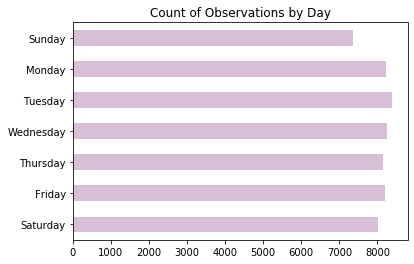

In [21]:
cats = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

time.day.value_counts().reindex(cats).plot.barh(color='thistle')

plt.title('Count of Observations by Day')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

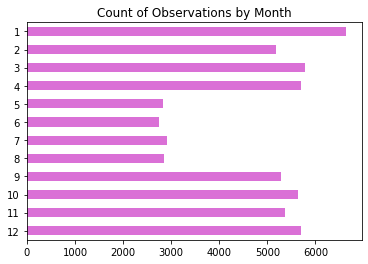

In [22]:
time.month.value_counts().sort_index().plot.barh(color='orchid')

plt.title('Count of Observations by Month')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

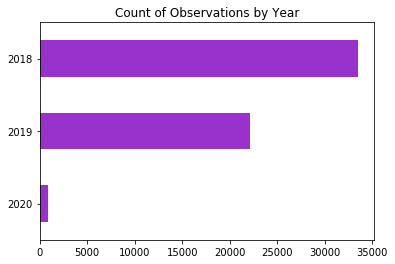

In [23]:
time.year.value_counts().sort_index().plot.barh(color='darkorchid')

plt.title('Count of Observations by Year')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()
plt.show()

### Unique Values in Columns

There are multiple names used for some of the routes. Route number can be used.

In [24]:
time.groupby(['route', 'route_name'])[['route_name']].count().head(20)

,,route_name
route,route_name,
2,2-BLANCO RD.,611
3,3-SAN PEDRO SKIP,612
4,4-SAN PEDRO,611
5,5-MC CULLOUGH,613
6,6-US 281 Express,438
7,7 STONEOAK/DOWNTOWN EXPRESS,430
8,8-N.ST.MARYS,611
9,9-BROADWAY,612
10,10-NACO/BROADWAY /NACO PASS,610


**<font color=purple>We still see that there are 225 unique routes but only 150 unique route names. Normalization of route names needed if route name is to be used.</font>**

In [25]:
for column in time:
    print(f'There are {time[column].nunique()} unique values in the {column} column')
    print()

There are 200 unique values in the route column

There are 104 unique values in the route_name column

There are 37177 unique values in the current_revenue column

There are 4422 unique values in the ridership column

There are 265 unique values in the token_count column

There are 1 unique values in the ticket_count column

There are 2880 unique values in the pass_count column

There are 999 unique values in the bill_count column

There are 6228 unique values in the unclassified_revenue column

There are 518 unique values in the dump_count column

There are 12 unique values in the month column

There are 3 unique values in the year column

There are 7 unique values in the day column

